In [1]:
!pip install wordcloud

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import plotly.io as pio
pio.renderers.default = "iframe_connected"




# Exploration du dataset

In [4]:
print("Etape 1: Chargement des données: ")
df = pd.read_csv("netflix_titles.csv", encoding="latin1")
print("Aperçu des données :")
print(df.head())

Etape 1: Chargement des données: 
Aperçu des données :
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          

In [5]:
print("Etape 2: Suppression des lignes vides: ")
avant = len(df)
df.dropna(inplace=True)
print(f"{avant - len(df)} lignes supprimées (NA). Il reste {len(df)} lignes.")

Etape 2: Suppression des lignes vides: 
3475 lignes supprimées (NA). Il reste 5332 lignes.


In [6]:
print("Etape 3: Suppression des doublons: ")
avant = len(df)
df.drop_duplicates(inplace=True)
print(f"{avant - len(df)} doublons supprimés. Il reste {len(df)} lignes.")

Etape 3: Suppression des doublons: 
0 doublons supprimés. Il reste 5332 lignes.


In [7]:
print("Étape 4 : Conversion des dates en datetime: ")

#Pour date_added
df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce')
print("Conversion terminée. Exemple:")
print(df["date_added"].head())
print(df["date_added"].dtypes)

#Pour release_year
df["release_year"] = pd.to_datetime(df["release_year"], errors='coerce')
print("Conversion terminée. Exemple:")
print(df["release_year"].head())
print(df["release_year"].dtypes)

Étape 4 : Conversion des dates en datetime: 
Conversion terminée. Exemple:
7    2021-09-24
8    2021-09-24
9    2021-09-24
12   2021-09-23
24   2021-09-21
Name: date_added, dtype: datetime64[ns]
datetime64[ns]
Conversion terminée. Exemple:
7    1970-01-01 00:00:00.000001993
8    1970-01-01 00:00:00.000002021
9    1970-01-01 00:00:00.000002021
12   1970-01-01 00:00:00.000002021
24   1970-01-01 00:00:00.000001998
Name: release_year, dtype: datetime64[ns]
datetime64[ns]


# Analyse des contenus

### Films vs Séries

1) Films vs Séries
type
Movie      5185
TV Show     147
Name: count, dtype: int64


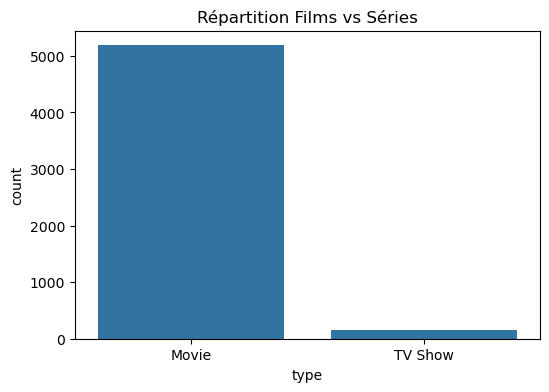

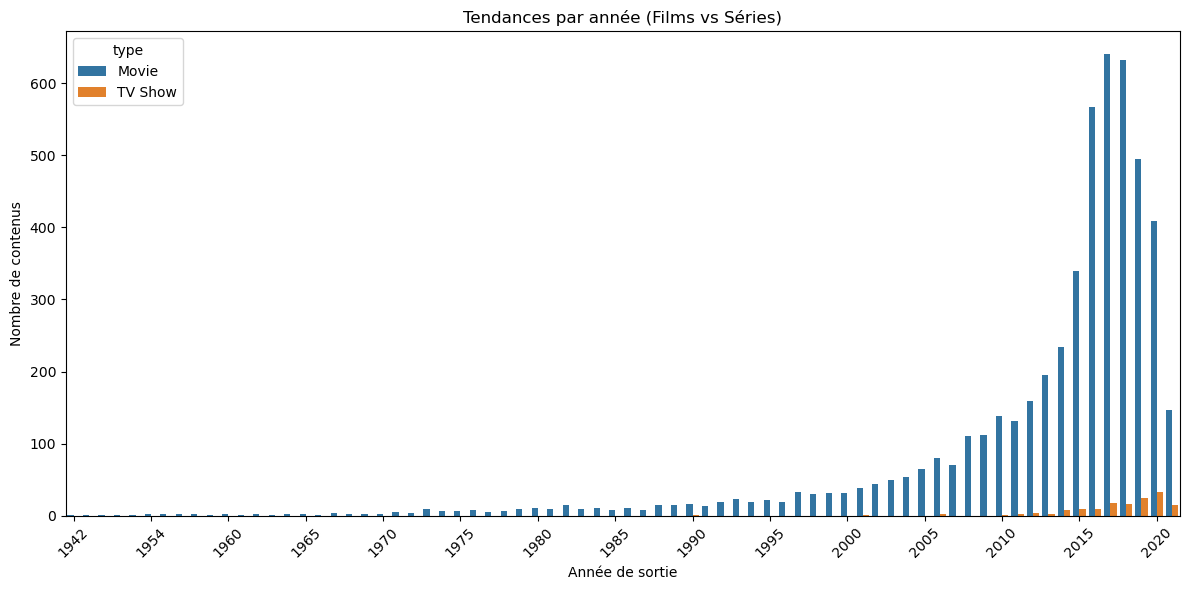

In [32]:
print("1) Films vs Séries")
type_counts = df["type"].value_counts()
print(type_counts)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type")
plt.title("Répartition Films vs Séries")
plt.show()

# Évolution Films/Séries par année
if "release_year" in df.columns:
    df_sorted = df.sort_values("release_year")
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_sorted, x="release_year", hue="type")
    years = sorted(df_sorted["release_year"].dropna().unique())
    plt.xticks(
        ticks=range(0, len(years), 5),
        labels=years[::5],
        rotation=45
    )
    plt.title("Tendances par année (Films vs Séries)")
    plt.xlabel("Année de sortie")
    plt.ylabel("Nombre de contenus")
    plt.tight_layout()
    plt.show()



On observe que les films sont le type de contenu le plus présent sur la plateforme Netflix. De plus, on observe un ajout exponentiel de contenu à partir des années 2010, ce qui correspond à la période d'introduction du streaming en ligne par la plateforme, avec un pic en 2017 suivi d'une légère baisse d'ajout de contenu dans les années suivantes. 


### Genres


2) Genres principaux
International Movies        2369
Dramas                      2293
Comedies                    1553
Action & Adventure           806
Independent Movies           740
Romantic Movies              579
Thrillers                    547
Children & Family Movies     503
Documentaries                391
Horror Movies                336
Stand-Up Comedy              294
Music & Musicals             292
Sci-Fi & Fantasy             236
Sports Movies                156
Classic Movies               108
Name: count, dtype: int64


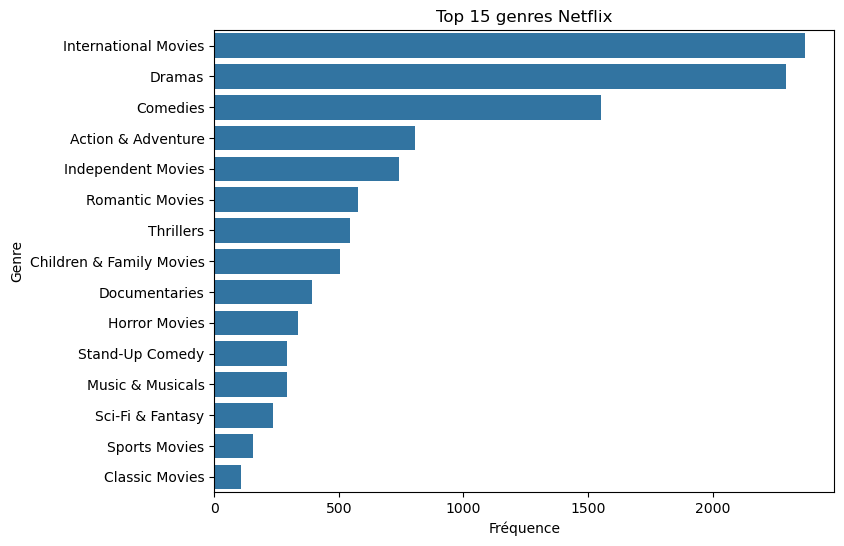

In [11]:
print("2) Genres principaux")

# coller tous les genres dans une liste
genres = df["listed_in"].dropna().str.split(", ")
genres_flat = [g for sublist in genres for g in sublist]

genres_series = pd.Series(genres_flat)
top_genres = genres_series.value_counts().head(15)

print(top_genres)

plt.figure(figsize=(8,6))
sns.barplot(y=top_genres.index, x=top_genres.values)
plt.title("Top 15 genres Netflix")
plt.xlabel("Fréquence")
plt.ylabel("Genre")
plt.show()

Netflix propose 15 genres principaux de contenu entre des films internationaux, des documentaires et des comédies musicales. Les genres les plus fréquent sur la plateforme sont les films internationaux (2369), les drames (2293) et les comédies (1553). 

### Pays


3) Répartition géographique (Country) 
United States     2485
India              940
United Kingdom     484
Canada             295
France             293
Germany            167
Spain              161
Japan              124
China              109
Mexico             101
Egypt               99
Hong Kong           98
Nigeria             96
Turkey              86
Indonesia           85
Name: count, dtype: int64


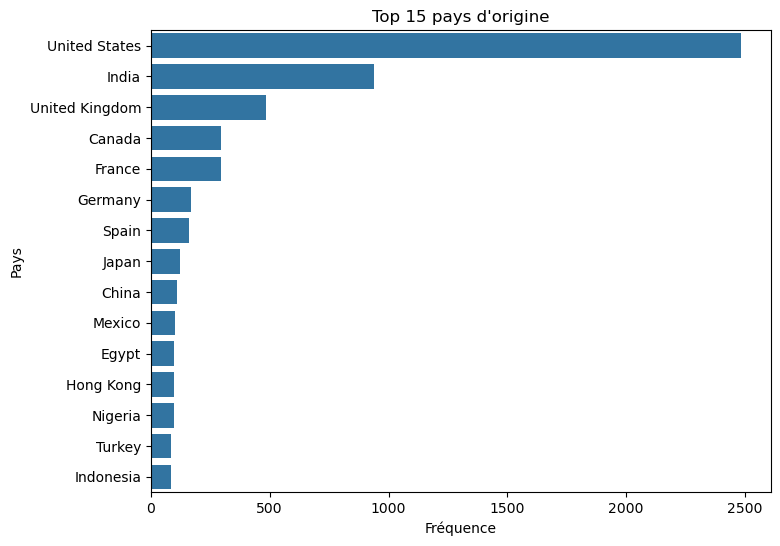

In [12]:
print("\n3) Répartition géographique (Country) ")

countries = df["country"].dropna().str.split(", ")
countries_flat = [c for sublist in countries for c in sublist]

countries_series = pd.Series(countries_flat)
top_countries = countries_series.value_counts().head(15)

print(top_countries)

plt.figure(figsize=(8,6))
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title("Top 15 pays d'origine")
plt.xlabel("Fréquence")
plt.ylabel("Pays")
plt.show()

Les contenus disponibles sur la plateforme sont produits par de nombreux pays. Les pays principaux sont les Etats-Unis (2485), l'Inde (940) et le Royaume Unis (484).

### Casting et réalisateurs


4) Acteurs/Actrices les plus fréquents
Anupam Kher          42
Shah Rukh Khan       34
Naseeruddin Shah     31
Om Puri              30
Akshay Kumar         30
Amitabh Bachchan     28
Paresh Rawal         28
Boman Irani          27
Kareena Kapoor       25
Samuel L. Jackson    21
Ajay Devgn           21
Adam Sandler         20
Nicolas Cage         20
Salman Khan          20
Kay Kay Menon        19
Name: count, dtype: int64


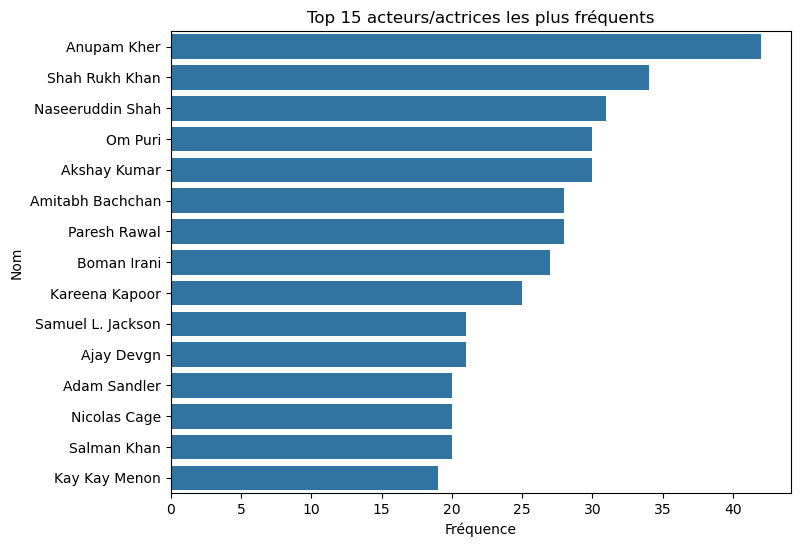

In [13]:
print("4) Acteurs/Actrices les plus fréquents")

cast = df["cast"].dropna().str.split(", ")
cast_flat = [c.strip() for sublist in cast for c in sublist]

top_cast = pd.Series(cast_flat).value_counts().head(15)
print(top_cast)

plt.figure(figsize=(8,6))
sns.barplot(y=top_cast.index, x=top_cast.values)
plt.title("Top 15 acteurs/actrices les plus fréquents")
plt.xlabel("Fréquence")
plt.ylabel("Nom")
plt.show()

De nombreux acteurs et actrices sont donc amenés à travailler dans les contenus présents sur la plateforme. Les acteurs et actrices que l'on retrouve le plus sur la plateforme sont Anupam Kher (42 films), Shah Rukh Khan (34 films) et Naseeruddin Shah (31 films).


5) Réalisateurs les plus fréquents
Jan Suter              21
RaÃºl Campos           19
Marcus Raboy           15
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Steven Spielberg       11
Don Michael Paul       10
David Dhawan            9
YÄ±lmaz ErdoÄan        9
Anurag Kashyap          9
Shannon Hartman         9
Umesh Mehra             8
Name: count, dtype: int64


C:\Users\adele\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


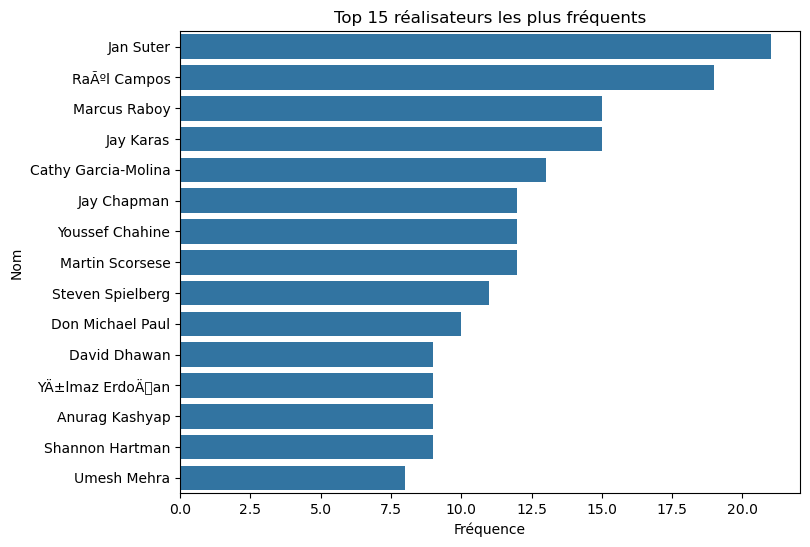

In [30]:
print("5) Réalisateurs les plus fréquents")

directors = df["director"].dropna().str.split(", ")
directors_flat = [d.strip() for sublist in directors for d in sublist]

top_directors = pd.Series(directors_flat).value_counts().head(15)
print(top_directors)

plt.figure(figsize=(8,6))
sns.barplot(y=top_directors.index, x=top_directors.values)
plt.title("Top 15 réalisateurs les plus fréquents")
plt.xlabel("Fréquence")
plt.ylabel("Nom")
plt.show()

De même, les réalisateurs et réalisatrices les plus présents sont Jan Suter (21 films), Raùl Campos (19 films), Marcus Raboy (15 films) et Jay Kars (15 films).

# Analyse temporelle

### Distribution par année de sortie

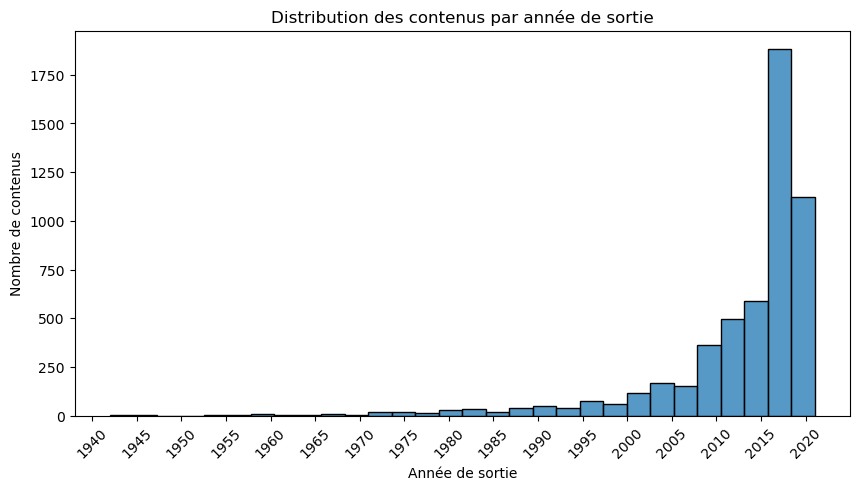

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(df["release_year"].dropna(), bins=30)
plt.title("Distribution des contenus par année de sortie")
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de contenus")
plt.locator_params(axis="x", nbins=20)  
plt.xticks(rotation=45)
plt.show()

On observe une sortie exponentielle de contenu à partir des années 2010, ce qui correspond à la période d'introduction du streaming en ligne par la plateforme, avec un pic en 2017 suivi d'une légère baisse de sortie de contenu dans les années suivantes.

### Analyse de la colonne data_added

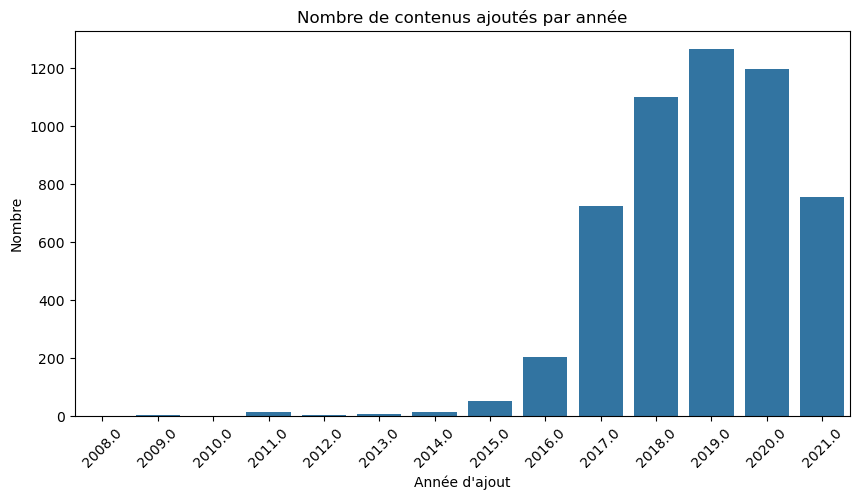

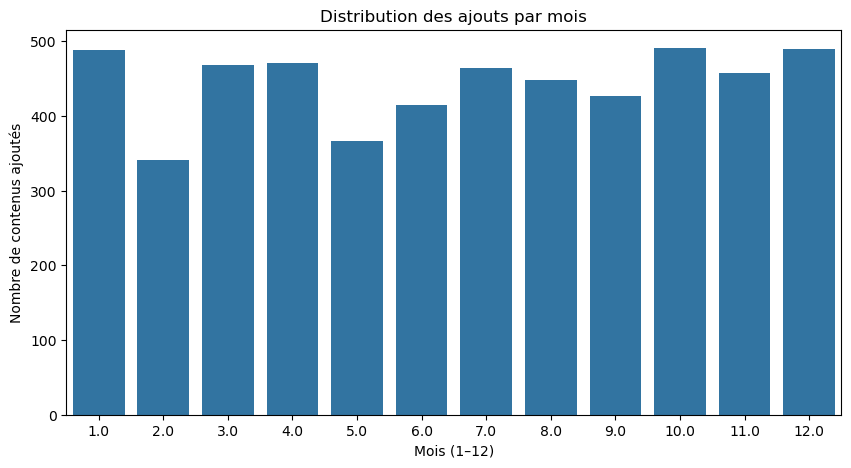

In [15]:
# S'assurer que la colonne est bien en datetime
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

# Extraire année et mois
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month

# --- Nombre de contenus ajoutés par année ---
plt.figure(figsize=(10,5))
sns.countplot(x=df["year_added"].dropna())
plt.title("Nombre de contenus ajoutés par année")
plt.xlabel("Année d'ajout")
plt.ylabel("Nombre")
plt.xticks(rotation=45)
plt.show()

# --- Ajouts par mois (tous années confondues) ---
plt.figure(figsize=(10,5))
sns.countplot(x=df["month_added"].dropna())
plt.title("Distribution des ajouts par mois")
plt.xlabel("Mois (1–12)")
plt.ylabel("Nombre de contenus ajoutés")
plt.show()

On observe que de nombreux ajouts de contenus ont été fait à partir de 2017 avec un pic en 2019 suivi d'une légère recrudescence d'ajout dans les années suivantes. Les mois les plus propices à l'ajout de contenu sur la plateforme sont janvier, octobre et décembre. Les mois durant lesquels le moins d'ajout de contenu est effectué sont février, mai, juin et septembre.

# Visualisations

### Histogramme

In [36]:
def duration_to_numeric(x):
    if pd.isna(x):
        return None
    x = str(x)
    if "min" in x:
        return int(x.replace("min", "").strip())
    if "Season" in x:
        n = int(x.split()[0])
        return 1000 + n  
    return None

df["duration_numeric"] = df["duration"].apply(duration_to_numeric)
ordered_labels = (
    df.dropna(subset=["duration_numeric"])
      .sort_values("duration_numeric")["duration"]
      .unique()
)
fig2 = px.histogram(
    df,
    x="duration",
    category_orders={"duration": ordered_labels},
    nbins=40,
    title="Histogramme de la durée des contenus"
)

fig2.update_layout(
    xaxis_title="Durée (minutes ou saisons)",
    yaxis_title="Fréquence"
)

fig2.show()


On observe que la majorité des contenus proposés sont compris enter 80 et 120 minutes (en excluant les séries). Pour les série, le temps le plus proposé est 1 saison. 

### Countplot

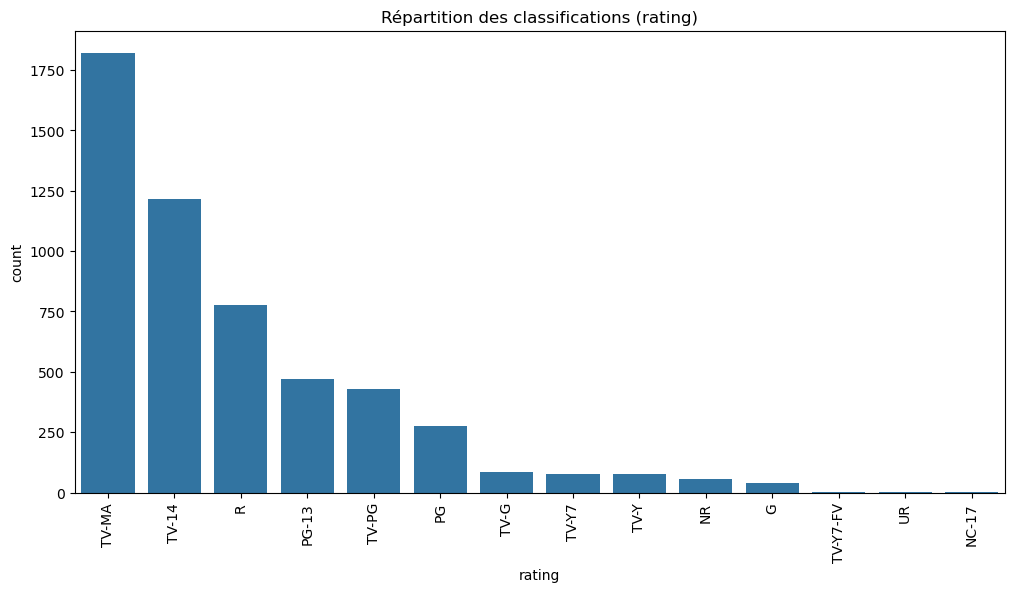

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["rating"], order=df["rating"].value_counts().index)
plt.title("Répartition des classifications (rating)")
plt.xticks(rotation=90)
plt.show()


Concernant la classification des contenus, la classification la plus présente est TV-MA (contenu mature), suivi d'un contenu déconseillé au moins de 14 ans (TV-14).

### Boxplots

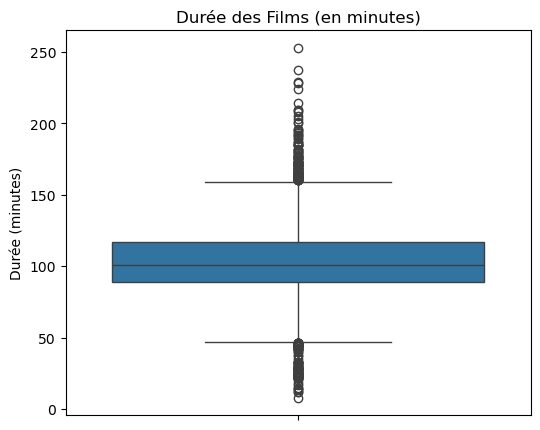

In [10]:
def parse_duration_minutes(x):
    if isinstance(x, str) and "min" in x:
        return int(x.replace("min", "").strip())
    return None

def parse_duration_seasons(x):
    if isinstance(x, str) and "Season" in x:
        return int(x.split()[0])
    return None

df["duration_minutes"] = df["duration"].apply(parse_duration_minutes)
df["duration_seasons"] = df["duration"].apply(parse_duration_seasons)




df_films = df[df["type"] == "Movie"].dropna(subset=["duration_minutes"])

plt.figure(figsize=(6,5))
sns.boxplot(y=df_films["duration_minutes"])
plt.title("Durée des Films (en minutes)")
plt.ylabel("Durée (minutes)")
plt.show()



D'après la boîte à moustaches de la durée des films en minutes, on observe que la majorité des films durent entre 80 et 120 minutes. Il y a quelques films dépassant les 200 minutes mais ils restent présent en minorité.

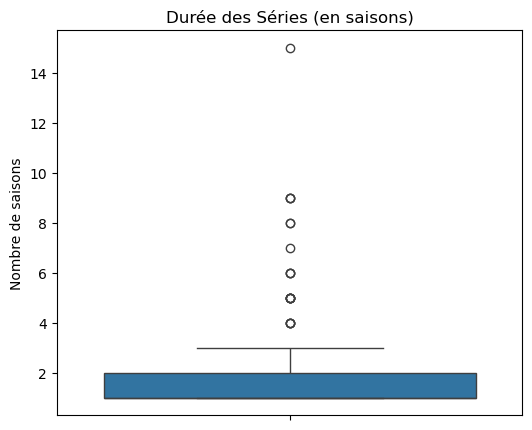

In [11]:
df_series = df[df["type"] == "TV Show"].dropna(subset=["duration_seasons"])

plt.figure(figsize=(6,5))
sns.boxplot(y=df_series["duration_seasons"])
plt.title("Durée des Séries (en saisons)")
plt.ylabel("Nombre de saisons")
plt.show()



Concernant les séries, la majorité des séries présentes sur la plateforme netflix comptent une seule saison. Quelque séries comptent plus de 4 saisons et une série compte plus de 14 saisons mais elles restent minimales.

### Visualisations interactives avec Plotly

In [19]:
# Timeline interactive des ajouts
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df["month_added"] = df["date_added"].dt.to_period("M").astype(str)

timeline = df.groupby("month_added").size().reset_index(name="count")

fig2 = px.line(
    timeline,
    x="month_added",
    y="count",
    title="Timeline des ajouts sur Netflix"
)
fig2.show()

On remarque que les ajouts ont augmenté à partir de janvier 2016 et ont atteint un pic en novembre 2019. 

In [21]:
genres = df["listed_in"].dropna().str.split(", ")
genres_flat = [g for sublist in genres for g in sublist]
genres_series = pd.Series(genres_flat).value_counts().head(20).reset_index()
genres_series.columns = ["genre", "count"]

fig = px.bar(
    genres_series,
    x="genre",
    y="count",
    title="Top 20 genres Netflix (interactif)",
)
fig.update_layout(xaxis={'categoryorder':'total descending'}, xaxis_tickangle=45)
fig.show()


Les genres les plus présents sur la plateforme sont les films internationaux, les drames et les comédies.

### Diagramme circulaire

In [8]:
genres = df["listed_in"].dropna().str.split(", ")
genres_flat = [g for sublist in genres for g in sublist]

genres_series = pd.Series(genres_flat)
top10 = genres_series.value_counts().head(10)

fig = px.pie(
    names=top10.index,
    values=top10.values,
    title="Top 10 genres",
    hole=0.0  # mets 0.4 pour un donut
)

fig.update_traces(textinfo="percent+label")

fig.show()


Nous pouvons observer la répartition des contenus par genre. Les films internationaux représentent 23% de l'ensemble des contenus alors que les films indépendent ne représentent que 7%. 